## Penjelasan Dataset yang digunakan

In [ ]:
## Berikan penjelasan terkait data apa yang digunakan diantaranya:
# 1. Kasus yang diambil
# 2. Penjelasan setiap kolomnya
# 3. Import library
# 4. Load data

Kasus yang diambil pada proyek ini adalah analisis sentimen opini publik terhadap Pemilihan Presiden (Pilpres) dengan memanfaatkan data tweet dari media sosial Twitter yang berisi pendapat, dukungan, maupun kritik masyarakat terhadap kandidat atau isu Pilpres, kemudian sentimen pada setiap tweet tersebut diklasifikasikan ke dalam kategori positif, negatif, atau netral.

Berikut penjelasan setiap kolom pada dataset Sentiment1.csv:

Date
Kolom yang berisi informasi tanggal dan waktu ketika tweet diposting di Twitter. Formatnya berupa timestamp (misalnya: Wed Dec 13 23:47:11 +0000 2023).

Text
Kolom utama yang berisi isi teks tweet, yaitu opini atau komentar pengguna terkait Pemilihan Presiden (Pilpres). Teks inilah yang akan dianalisis sentimennya.

Username
Berisi nama atau username akun Twitter yang memposting tweet tersebut. Kolom ini menunjukkan identitas pemilik opini, namun tidak digunakan langsung dalam pemodelan sentimen.

Length_Text
Menunjukkan panjang teks tweet dalam bentuk angka, biasanya dihitung berdasarkan jumlah karakter pada kolom Text. Kolom ini berguna untuk melihat variasi panjang tweet.

Sentiment
Kolom label yang menunjukkan kelas sentimen dari setiap tweet. Nilainya berupa kategori Positive, Negative, atau Neutral dan menjadi target yang akan diprediksi oleh model analisis sentimen.

In [11]:

import pandas as pd
import numpy as np

import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression


from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [12]:

import pandas as pd

data = pd.read_csv("Sentiment1.csv", encoding="cp1252")
data.head()


,Date,Text,Username,Length_Text,Sentiment
0,Wed Dec 13 23:47:11 +0000 2023,@Hasbil_Lbs @aniesbaswedan gampang sih bikin v...,DzulfiqorParisi,254,Negative
1,Wed Dec 13 23:46:34 +0000 2023,"Lagi, lagi dan terus Tokoh Harapan yg dirinduk...",sumadiseloguno,222,Positive
2,Wed Dec 13 23:43:39 +0000 2023,Biarpun BuzzeRp dikerahkan utk trs bela junjun...,AlfathMelfas,281,Negative
3,Wed Dec 13 23:36:50 +0000 2023,Kagum dgn senyum pak Anies yg teteup tersunggi...,SBahriTweet,216,Positive
4,Wed Dec 13 23:36:04 +0000 2023,Gemoy sih tapiiii..udah TUAAAAA..????...jadi s...,samask_1,161,Neutral


## Data Understanding

In [ ]:
# 1. Jumlah baris data
# 2. Panjang rata-rata setiap baris
# 3. Cek data duplikasi
# 4. Cek data kosong
# 5. Distribusi data menggunakan bar chart, line chart atau word cloud, seperti kata yang sering muncul.

In [13]:


jumlah_baris = data.shape[0]
print("Jumlah baris data:", jumlah_baris)


Jumlah baris data: 1336


In [16]:
print("Panjang rata-rata setiap baris (tweet):", round(rata_panjang, 2))

Panjang rata-rata setiap baris (tweet): 196.86


In [17]:

jumlah_duplikat = data.duplicated().sum()
print("Jumlah baris duplikat:", jumlah_duplikat)


data_duplikat = data[data.duplicated()]
data_duplikat.head()


Jumlah baris duplikat: 0


,Date,Text,Username,Length_Text,Sentiment


In [18]:


print("Jumlah data kosong per kolom:")
print(data.isna().sum())


total_kosong = data.isna().sum().sum()
print("\nTotal seluruh data kosong:", total_kosong)


Jumlah data kosong per kolom:
Date           0
Text           0
Username       0
Length_Text    0
Sentiment      0
dtype: int64

Total seluruh data kosong: 0


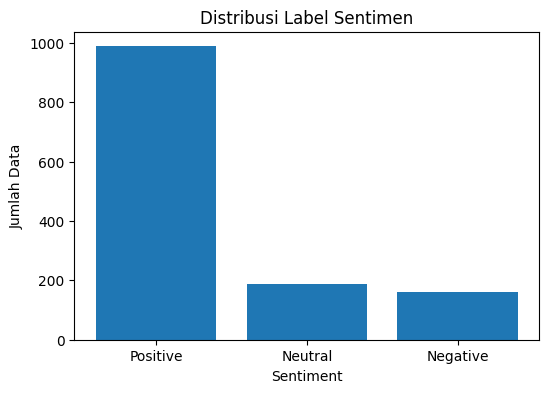

In [19]:


import matplotlib.pyplot as plt

sentiment_counts = data['Sentiment'].value_counts()

plt.figure(figsize=(6,4))
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.xlabel('Sentiment')
plt.ylabel('Jumlah Data')
plt.title('Distribusi Label Sentimen')
plt.show()


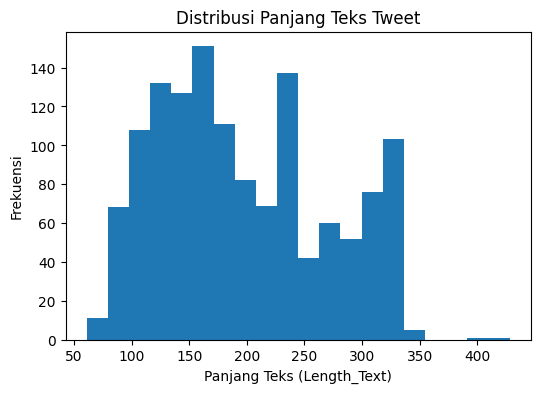

In [20]:


plt.figure(figsize=(6,4))
plt.hist(data['Length_Text'], bins=20)
plt.xlabel('Panjang Teks (Length_Text)')
plt.ylabel('Frekuensi')
plt.title('Distribusi Panjang Teks Tweet')
plt.show()


In [21]:
pip install wordcloud


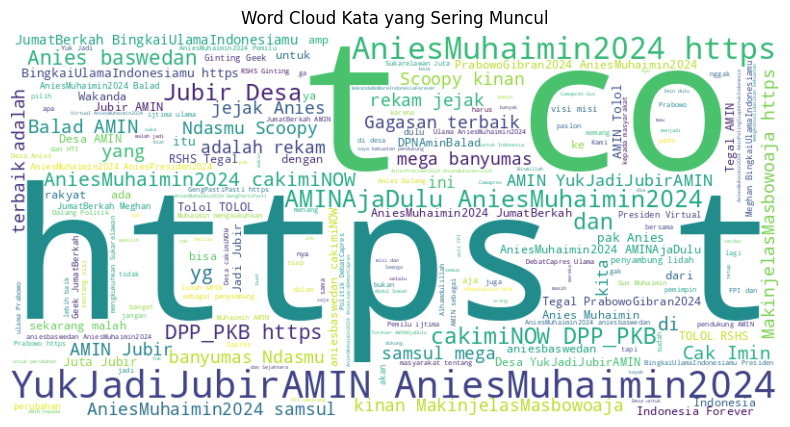

In [22]:
from wordcloud import WordCloud


all_text = " ".join(str(teks) for teks in data['Text'])


wc = WordCloud(width=800, height=400, background_color="white").generate(all_text)

plt.figure(figsize=(10,5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud Kata yang Sering Muncul')
plt.show()


## Data Text Processing

In [ ]:
# 1. Tokenisasi
# 2. Lemmatization
# 3. Stemming
# 4. Stopword removal (Tanda baca, angka dan kata)
# 5. Text Normalisasi
# 6. Matrix correlation (opsional)
# 7. Labeling data (Lexicon, Bert, atau polarity)
# 8. Text Vektorisasi
# 9. Data splitting dengan skala (0.8, 02)(0.9, 0.1)(0.75, 0.25)(0.85, 0.15) pilih salah satu dari beberapa skala yang ditentukan

In [23]:
data['Text'] = data['Text'].astype(str)

def simple_tokenize(text):
    # lower case
    text = text.lower()
    # hilangkan karakter non-huruf dan non-spasi
    text = re.sub(r'[^a-zA-Zá-źÀ-Ž0-9\s]', ' ', text)
    # split berdasarkan spasi
    tokens = text.split()
    return tokens

import re

data['tokens'] = data['Text'].apply(simple_tokenize)

# Lihat 5 data pertama hasil tokenisasi
data[['Text', 'tokens']].head()

,Text,tokens
0,@Hasbil_Lbs @aniesbaswedan gampang sih bikin v...,"[hasbil, lbs, aniesbaswedan, gampang, sih, bik..."
1,"Lagi, lagi dan terus Tokoh Harapan yg dirinduk...","[lagi, lagi, dan, terus, tokoh, harapan, yg, d..."
2,Biarpun BuzzeRp dikerahkan utk trs bela junjun...,"[biarpun, buzzerp, dikerahkan, utk, trs, bela,..."
3,Kagum dgn senyum pak Anies yg teteup tersunggi...,"[kagum, dgn, senyum, pak, anies, yg, teteup, t..."
4,Gemoy sih tapiiii..udah TUAAAAA..????...jadi s...,"[gemoy, sih, tapiiii, udah, tuaaaaa, jadi, ser..."


In [24]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [25]:


import nltk
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(token) for token in tokens]

# Asumsikan kolom 'tokens' sudah ada dari tahap tokenisasi
data['lemmatized'] = data['tokens'].apply(lemmatize_tokens)

# Lihat hasil lemmatization untuk beberapa baris
data[['Text', 'tokens', 'lemmatized']].head()


,Text,tokens,lemmatized
0,@Hasbil_Lbs @aniesbaswedan gampang sih bikin v...,"[hasbil, lbs, aniesbaswedan, gampang, sih, bik...","[hasbil, lb, aniesbaswedan, gampang, sih, biki..."
1,"Lagi, lagi dan terus Tokoh Harapan yg dirinduk...","[lagi, lagi, dan, terus, tokoh, harapan, yg, d...","[lagi, lagi, dan, terus, tokoh, harapan, yg, d..."
2,Biarpun BuzzeRp dikerahkan utk trs bela junjun...,"[biarpun, buzzerp, dikerahkan, utk, trs, bela,...","[biarpun, buzzerp, dikerahkan, utk, trs, bela,..."
3,Kagum dgn senyum pak Anies yg teteup tersunggi...,"[kagum, dgn, senyum, pak, anies, yg, teteup, t...","[kagum, dgn, senyum, pak, anies, yg, teteup, t..."
4,Gemoy sih tapiiii..udah TUAAAAA..????...jadi s...,"[gemoy, sih, tapiiii, udah, tuaaaaa, jadi, ser...","[gemoy, sih, tapiiii, udah, tuaaaaa, jadi, ser..."


In [32]:


import nltk
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

def stem_tokens(tokens):
    return [stemmer.stem(token) for token in tokens]

# Asumsikan kolom 'tokens' sudah ada dari tahap tokenisasi
data['stemmed'] = data['tokens'].apply(stem_tokens)

# Jika ingin kembalikan lagi ke bentuk string satu kalimat:
data['text_stemmed'] = data['stemmed'].apply(lambda x: " ".join(x))

# Lihat hasil
data[['Text', 'tokens', 'stemmed', 'text_stemmed']].head()


,Text,tokens,stemmed,text_stemmed
0,@Hasbil_Lbs @aniesbaswedan gampang sih bikin v...,"[hasbil, lbs, aniesbaswedan, gampang, sih, bik...","[hasbil, lb, aniesbaswedan, gampang, sih, biki...",hasbil lb aniesbaswedan gampang sih bikin vide...
1,"Lagi, lagi dan terus Tokoh Harapan yg dirinduk...","[lagi, lagi, dan, terus, tokoh, harapan, yg, d...","[lagi, lagi, dan, teru, tokoh, harapan, yg, di...",lagi lagi dan teru tokoh harapan yg dirindukan...
2,Biarpun BuzzeRp dikerahkan utk trs bela junjun...,"[biarpun, buzzerp, dikerahkan, utk, trs, bela,...","[biarpun, buzzerp, dikerahkan, utk, tr, bela, ...",biarpun buzzerp dikerahkan utk tr bela junjung...
3,Kagum dgn senyum pak Anies yg teteup tersunggi...,"[kagum, dgn, senyum, pak, anies, yg, teteup, t...","[kagum, dgn, senyum, pak, ani, yg, teteup, ter...",kagum dgn senyum pak ani yg teteup tersung di ...
4,Gemoy sih tapiiii..udah TUAAAAA..????...jadi s...,"[gemoy, sih, tapiiii, udah, tuaaaaa, jadi, ser...","[gemoy, sih, tapiiii, udah, tuaaaaa, jadi, ser...",gemoy sih tapiiii udah tuaaaaa jadi sere lupa ...


In [33]:
# 4. Stopword removal (tanda baca, angka, dan kata umum)

import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Ambil stopword bahasa Indonesia dan Inggris
stop_words_id = set(stopwords.words('indonesian'))
stop_words_en = set(stopwords.words('english'))
stop_words = stop_words_id.union(stop_words_en)

def clean_text(text):
    # pastikan bentuk string
    text = str(text)
    # lowercase
    text = text.lower()
    # hapus URL
    text = re.sub(r'http\S+|www\S+', ' ', text)
    # hapus mention dan hashtag
    text = re.sub(r'[@#]\w+', ' ', text)
    # hapus angka
    text = re.sub(r'\d+', ' ', text)
    # hapus tanda baca & karakter non huruf/angka
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)
    # hapus spasi berlebih
    text = re.sub(r'\s+', ' ', text).strip()

    # tokenisasi sederhana
    tokens = text.split()
    # buang stopword
    tokens = [t for t in tokens if t not in stop_words]

    # gabungkan kembali ke bentuk teks
    cleaned = " ".join(tokens)
    return cleaned

# Terapkan ke kolom Text (atau bisa ke kolom lain yang kamu mau)
data['text_clean'] = data['Text'].apply(clean_text)

# Lihat hasil
data[['Text', 'text_clean']].head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,Text,text_clean
0,@Hasbil_Lbs @aniesbaswedan gampang sih bikin v...,gampang sih bikin video kya gt konsepnya gt ga...
1,"Lagi, lagi dan terus Tokoh Harapan yg dirinduk...",tokoh harapan yg dirindukan jengkal tanah air ...
2,Biarpun BuzzeRp dikerahkan utk trs bela junjun...,biarpun buzzerp dikerahkan utk trs bela junjun...
3,Kagum dgn senyum pak Anies yg teteup tersunggi...,kagum dgn senyum anies yg teteup tersungging b...
4,Gemoy sih tapiiii..udah TUAAAAA..????...jadi s...,gemoy sih tapiiii udah tuaaaaa lupa berkali ka...


In [34]:
# 5. Text Normalisasi

# Kamus kata tidak baku / singkatan ke bentuk baku
normalization_dict = {
    "gk": "tidak",
    "ga": "tidak",
    "nggak": "tidak",
    "gak": "tidak",
    "ngga": "tidak",
    "tdk": "tidak",
    "bgt": "banget",
    "banged": "banget",
    "bgd": "banget",
    "bngt": "banget",
    "pilpres": "pilpres",
    "pres": "presiden",
    "anies": "anies",
    "prabowo": "prabowo",
    "ganjar": "ganjar",
    # silakan tambah sendiri kalau menemukan bentuk lain
}

def normalize_text(text):
    tokens = text.split()
    normalized_tokens = []
    for t in tokens:
        if t in normalization_dict:
            normalized_tokens.append(normalization_dict[t])
        else:
            normalized_tokens.append(t)
    return " ".join(normalized_tokens)

# Asumsi kita memakai kolom 'text_clean' dari tahap sebelumnya
data['text_normalized'] = data['text_clean'].apply(normalize_text)

# Lihat hasil sebelum dan sesudah normalisasi
data[['Text', 'text_clean', 'text_normalized']].head()


,Text,text_clean,text_normalized
0,@Hasbil_Lbs @aniesbaswedan gampang sih bikin v...,gampang sih bikin video kya gt konsepnya gt ga...,gampang sih bikin video kya gt konsepnya gt ga...
1,"Lagi, lagi dan terus Tokoh Harapan yg dirinduk...",tokoh harapan yg dirindukan jengkal tanah air ...,tokoh harapan yg dirindukan jengkal tanah air ...
2,Biarpun BuzzeRp dikerahkan utk trs bela junjun...,biarpun buzzerp dikerahkan utk trs bela junjun...,biarpun buzzerp dikerahkan utk trs bela junjun...
3,Kagum dgn senyum pak Anies yg teteup tersunggi...,kagum dgn senyum anies yg teteup tersungging b...,kagum dgn senyum anies yg teteup tersungging b...
4,Gemoy sih tapiiii..udah TUAAAAA..????...jadi s...,gemoy sih tapiiii udah tuaaaaa lupa berkali ka...,gemoy sih tapiiii udah tuaaaaa lupa berkali ka...


Correlation matrix:
                   Length_Text  Sentiment_encoded
Length_Text           1.000000          -0.381881
Sentiment_encoded    -0.381881           1.000000


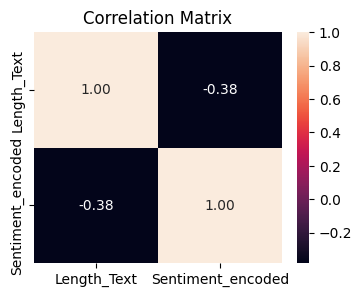

In [35]:
# 6. Matrix correlation (opsional)

import matplotlib.pyplot as plt
import seaborn as sns

# Copy data supaya rapi
df_corr = data.copy()

# Encode kolom Sentiment ke angka (misal: Negative=0, Neutral=1, Positive=2)
mapping_sentiment = {'Negative': 0, 'Neutral': 1, 'Positive': 2}
df_corr['Sentiment_encoded'] = df_corr['Sentiment'].map(mapping_sentiment)

# Pilih hanya kolom numerik untuk korelasi
numerical_cols = ['Length_Text', 'Sentiment_encoded']
corr_matrix = df_corr[numerical_cols].corr()

print("Correlation matrix:")
print(corr_matrix)

# Visualisasikan dalam bentuk heatmap
plt.figure(figsize=(4,3))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


Pada tugas ini, proses labeling tidak dilakukan secara otomatis menggunakan lexicon, polarity, maupun BERT karena dataset Sentiment1.csv sudah menyediakan kolom Sentiment yang berisi label sentimen untuk setiap tweet (Positive, Negative, atau Neutral). Oleh karena itu, kolom Sentiment langsung digunakan sebagai label (target) dalam proses pelatihan dan evaluasi model klasifikasi sentimen.

In [36]:
# 8. Text Vektorisasi (TF-IDF)

from sklearn.feature_extraction.text import TfidfVectorizer

# Gunakan kolom teks bersih
texts = data['text_normalized']  # ganti dengan 'text_clean' kalau itu yang kamu pakai

# Inisialisasi TF-IDF Vectorizer
tfidf = TfidfVectorizer(
    max_features=5000,      # batas jumlah fitur (opsional, bisa diubah)
    ngram_range=(1,1)       # pakai unigram; bisa (1,2) kalau mau tambah bigram
)

# Fit dan transform ke bentuk vektor
X = tfidf.fit_transform(texts)

print("Shape matriks TF-IDF:", X.shape)


Shape matriks TF-IDF: (1336, 2948)


In [37]:
# Melihat beberapa fitur (kata) yang terbentuk
feature_names = tfidf.get_feature_names_out()
print("Jumlah fitur:", len(feature_names))
print("Contoh fitur:", feature_names[:50])


Jumlah fitur: 2948
Contoh fitur: ['aah' 'aamiin' 'aamiinn' 'abah' 'abahnya' 'abaikan' 'abdul' 'abdurrahman'
 'abdussamad' 'ac' 'acak' 'acara' 'aceh' 'acuan' 'ad' 'adakah' 'adap'
 'adem' 'adi' 'adil' 'adilan' 'adu' 'adziim' 'aesthetic' 'agamanya' 'agen'
 'agromaritim' 'ah' 'ahad' 'ahmad' 'ahok' 'ai' 'aing' 'air' 'aja' 'ajaaah'
 'ajah' 'ajak' 'ajang' 'ajeunga' 'ajudan' 'ak' 'akademi' 'akal' 'akbar'
 'akhirah' 'akhlak' 'aki' 'akses' 'aksi']


In [38]:
# 9. Data splitting dengan skala (0.8, 0.2)

from sklearn.model_selection import train_test_split

# y bisa langsung pakai label Sentiment
y = data['Sentiment']   # atau ganti dengan kolom encoded kalau kamu sudah buat

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,      # 0.2 = 20% data jadi test, 80% data jadi train
    random_state=42,    # supaya hasil pembagian konsisten
    stratify=y          # menjaga proporsi kelas di train dan test
)

print("Ukuran data train:", X_train.shape[0])
print("Ukuran data test :", X_test.shape[0])


Ukuran data train: 1068
Ukuran data test : 268


## Data Modeling

In [ ]:
# Berikan Penjelasan tentang model yang dipilih

Pada tugas ini digunakan model Multinomial Naive Bayes untuk melakukan klasifikasi sentimen tweet menjadi Positive, Negative, dan Neutral. Model ini termasuk algoritma supervised learning yang sangat sering dipakai untuk teks karena bekerja dengan baik pada data fitur TF-IDF / Bag-of-Words.

Multinomial Naive Bayes menghitung peluang suatu teks termasuk ke dalam suatu kelas sentimen berdasarkan kata-kata yang muncul di dalamnya, dengan asumsi bahwa setiap kata bersifat saling bebas. Meskipun asumsi ini sederhana, model ini:

Cepat saat training dan prediksi,

Efektif untuk data teks berdimensi besar,

Mudah dijelaskan, sehingga cocok untuk tugas analisis sentimen di bidang akademik.

Karena alasan tersebut, Multinomial Naive Bayes dipilih sebagai model utama untuk memprediksi sentimen pada dataset tweet Pilpres.

## Data Evaluasi

In [ ]:
# 1. Confussion Matrix
# 2. Laporann Klasifikasi (Classification report)

Confusion Matrix (angka):
[[ 22   0  10]
 [  0   4  34]
 [  0   1 197]]


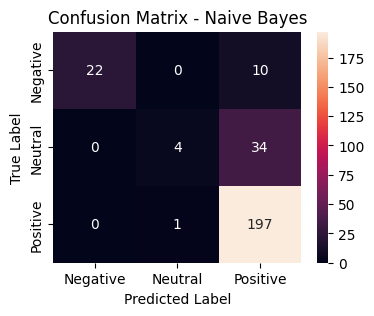

In [41]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Hitung confusion matrix
cm = confusion_matrix(y_test, y_pred)
labels = sorted(y_test.unique())  # supaya urutan label rapi

print("Confusion Matrix (angka):")
print(cm)

# Visualisasi dengan heatmap
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=labels,
            yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Naive Bayes')
plt.show()


In [42]:
from sklearn.metrics import classification_report

# 2. Laporan klasifikasi
print("Classification Report - Naive Bayes:")
print(classification_report(y_test, y_pred))


Classification Report - Naive Bayes:
              precision    recall  f1-score   support

    Negative       1.00      0.69      0.81        32
     Neutral       0.80      0.11      0.19        38
    Positive       0.82      0.99      0.90       198

    accuracy                           0.83       268
   macro avg       0.87      0.60      0.63       268
weighted avg       0.84      0.83      0.79       268



In [43]:
contoh_teks = ["anies presiden harapan rakyat indonesia"]
contoh_teks_clean = [normalize_text(clean_text(contoh_teks[0]))]  # pakai fungsi preprocessing kamu
contoh_vec = tfidf.transform(contoh_teks_clean)
prediksi = nb_model.predict(contoh_vec)
print("Teks:", contoh_teks[0])
print("Prediksi sentimen:", prediksi[0])


Teks: anies presiden harapan rakyat indonesia
Prediksi sentimen: Positive


## Data Prediksi

In [ ]:
# Gunakan model yang sudah dibuat dan prediksi pada data baru

In [44]:
# Contoh teks baru
new_text = ["anies presiden harapan rakyat indonesia tahun 2024"]

# Preprocessing sama seperti data training
new_text_clean = [normalize_text(clean_text(t)) for t in new_text]

# Ubah ke vektor TF-IDF
new_vec = tfidf.transform(new_text_clean)

# Prediksi
new_pred = nb_model.predict(new_vec)

print("Teks asli      :", new_text[0])
print("Setelah bersih:", new_text_clean[0])
print("Prediksi label :", new_pred[0])


Teks asli      : anies presiden harapan rakyat indonesia tahun 2024
Setelah bersih: anies presiden harapan rakyat indonesia
Prediksi label : Positive


In [45]:
new_texts = [
    "saya tidak setuju dengan programnya",
    "program kerja mereka bagus dan berpihak ke rakyat kecil",
    "biasa saja, belum lihat hasil nyata"
]

# Preprocessing
new_texts_clean = [normalize_text(clean_text(t)) for t in new_texts]

# TF-IDF
new_vecs = tfidf.transform(new_texts_clean)

# Prediksi
new_preds = nb_model.predict(new_vecs)

for teks, bersih, pred in zip(new_texts, new_texts_clean, new_preds):
    print("Teks asli      :", teks)
    print("Setelah bersih:", bersih)
    print("Prediksi label :", pred)
    print("-" * 50)


Teks asli      : saya tidak setuju dengan programnya
Setelah bersih: setuju programnya
Prediksi label : Positive
--------------------------------------------------
Teks asli      : program kerja mereka bagus dan berpihak ke rakyat kecil
Setelah bersih: program kerja bagus berpihak rakyat
Prediksi label : Positive
--------------------------------------------------
Teks asli      : biasa saja, belum lihat hasil nyata
Setelah bersih: lihat hasil nyata
Prediksi label : Positive
--------------------------------------------------
